# Control System Analysis: Tank Water Level Control
A control system is a set of components organized to regulate or direct the behavior of other systems. In the context of our liquid tank, we want to understand how the liquid height in the tank behaves in response to different input flow rates, considering the output flow rate, which is a function of the height.

## 1. System Modeling
We consider a tank with a cross-sectional area $A$. The liquid enters the tank with an input flow rate $Q_{in}(t)$ and exits the tank with an output flow rate $Q_{out}(t) = K \sqrt{h(t)}$, where $h(t)$ is the height of the liquid in the tank and $C$ is a proportionality constant.

The differential equation that models this system is:

$$
\frac{dh(t)}{dt}= \frac{1}{A} (Q_{in}(t)− Q_{out}(t))
$$
Where:

$$
\frac{dh(t)}{dt}= \frac{1}{A} (Q_{in}(t)− K \sqrt{h(t)})
$$

## 2. Linearization of the Differential Equation
To facilitate analysis in the frequency domain, we linearize the differential equation around an operating point $h_0$. This gives us a linear approximation of the system near that point.

The linearized equation is:

$$
\frac{dh(t)}{dt}= \frac{1}{A} (Q_{in}(t)− \frac{K}{2A\sqrt{h_0}}h(t))
$$

## 3. Transfer Function
The transfer function is a frequency-domain representation that relates a system's output to its input. For our system, the transfer function $G(s)$ relates the liquid height $h(t)$ (output) to the input flow rate $Q_{in}(t)$ (input).

After the Laplace transform, the transfer function is:

$$
G(s)= \frac{1}{{As + \frac{K}{2\sqrt{h_0}}}} = \frac{1}{tau.s + 1}
$$
where:
$$
tau = \frac{2A \sqrt{h_{0}}}{K}
$$




## 4. Simulation
Here we will start our simulation of the Transfer Function, explaining the code in detail, as well as simulating the system for different types of responses.
### 4.1 Configuration and Library Import
First, let's import the necessary libraries:


In [3]:
!pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.9/513.9 kB 2.0 MB/s eta 0:00:00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl #if it is not installed, insert a line of code "!pip install control"

* numpy é utilizado para operações matemáticas e manipulação de arrays.
* matplotlib.pyplot é uma biblioteca gráfica para plotar gráficos e visualizar dados.
* control contém ferramentas para análise e design de sistemas de controle

4.2 Definition of System Parameters

In [21]:
A = 2.0 # Tank cross-sectional area in m^2
K = 0.5 # Proportionality constant in m^(3/2)/s
h_0 = 1.0 # Operating head in m



$A$: We chose an area of $1.0 \, m^2$ for simplicity. This means the tank has a cross-sectional area of 1 square meter. You can think of this as a square tank with 1m sides or a circular tank with a radius of approximately $0.564 \, m$.

$K$: The constant $C$ determines how quickly the liquid exits the tank. A value of $0.5 \, m^{3/2}/s$ was chosen arbitrarily to represent a moderate flow rate. Larger values of $K$ would represent larger orifices or less resistance to flow.

$h_0$: The operating height represents the nominal or equilibrium height of the liquid in the tank. We chose $1.0 \, m$ for simplicity, but in a real scenario, this would be determined by the typical operation of the tank.



### 4.3 Construction of the Transfer Function

In [19]:
num = [1]
den = [A, K/(2*np.sqrt(h_0))]

system = ctrl.TransferFunction(num, den)

Aqui, definimos o numerador e o denominador da função de transferência com base na equação linearizada. A função de transferência é uma representação no domínio da frequência que relaciona a saída (altura do líquido) à entrada (vazão de entrada).



### 4.4 Step Response Simulation for Different Amplitudes
Let's consider three input amplitudes: 0.1, 0.2, and 0.25 (arbitrary units that could, for example, represent $m^3/s$ of flow rate).



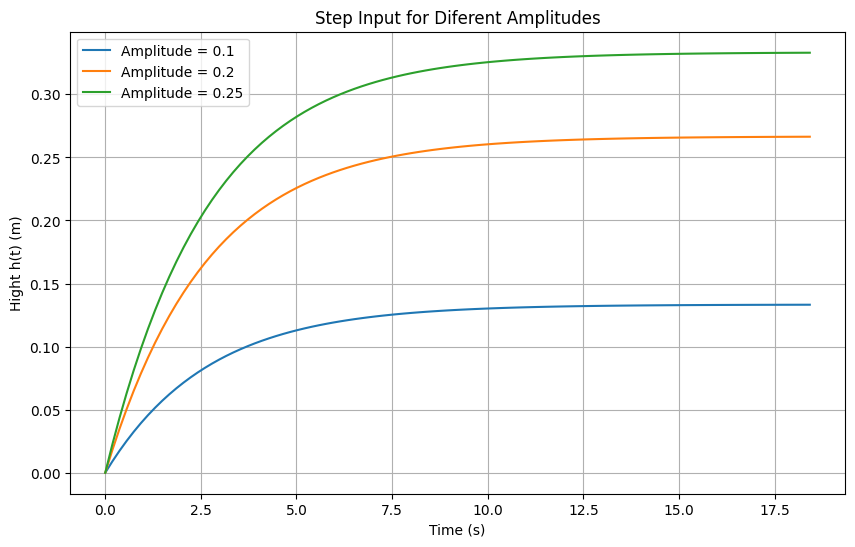

In [20]:
amplitudes = [0.1, 0.2, 0.25]

plt.figure(figsize=(10,6))

for amp in amplitudes:
    t, y = ctrl.step_response(amp * system)
    plt.plot(t, y, label=f'Amplitude = {amp}')

plt.title('Step Input for Diferent Amplitudes')
plt.xlabel('Time (s)')
plt.ylabel('Hight h(t) (m)')
plt.legend()
plt.grid(True)
plt.show()


### 4.5 Impulse Response Simulation for Different Amplitudes



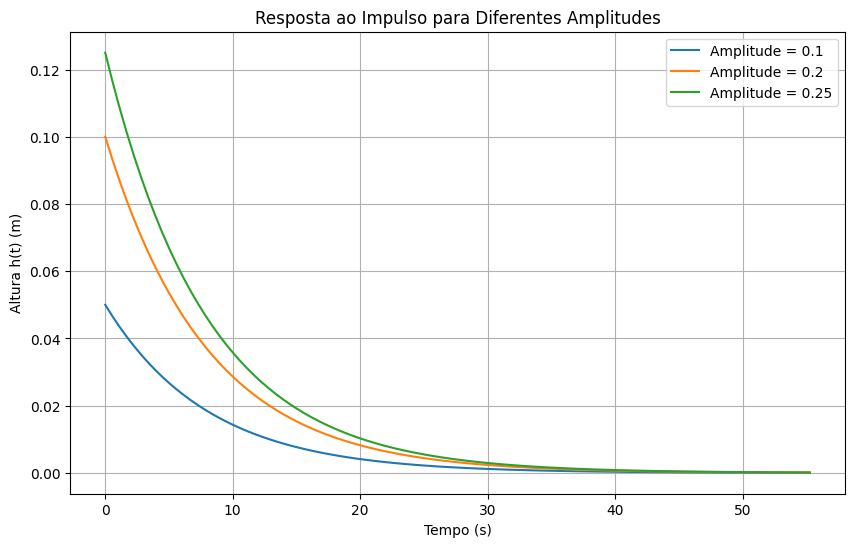

In [ ]:
plt.figure(figsize=(10,6))

for amp in amplitudes:
    t, y = ctrl.impulse_response(amp * system)
    plt.plot(t, y, label=f'Amplitude = {amp}')

plt.title('Step Input with Diferent Amplitudes')
plt.xlabel('Time (s)')
plt.ylabel('Hight h(t) (m)')
plt.legend()
plt.grid(True)
plt.show()


### 4.6 Sinusoidal Response Simulation for Different Frequencies with an Amplitude of 0.1
We will keep the frequencies at 1 Hz, 10 Hz, and 100 Hz, with an amplitude of $0.1 \, m^3$.

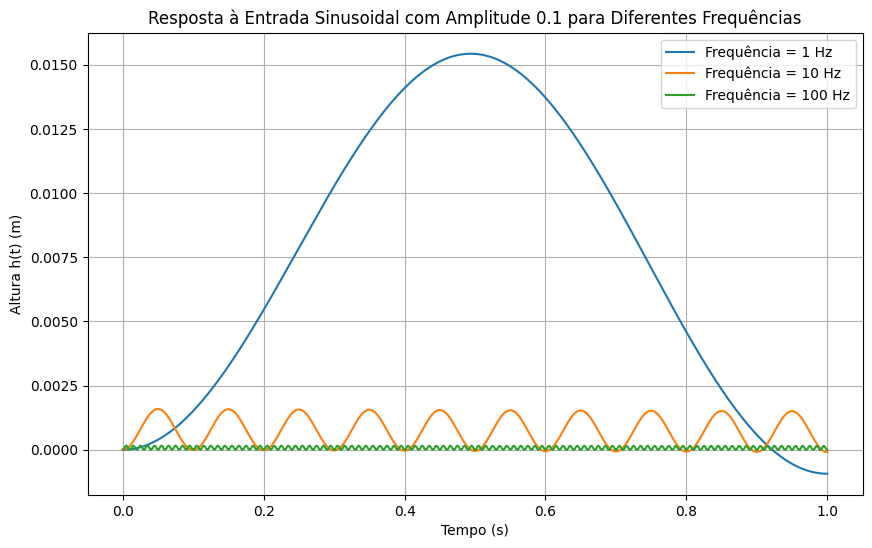

In [ ]:
amplitude = 0.1
frequencies = [1, 10, 100]
t = np.linspace(0, 1, 5000)  # 1 second of simulation with high resolution

plt.figure(figsize=(10,6))

for freq in frequencies:
    u = amplitude * np.sin(2 * np.pi * freq * t)
    t, y = ctrl.forced_response(system, t, u)
    plt.plot(t, y, label=f'Frequency = {freq} Hz')

plt.title(f'Response to Sinusoidal Input with Amplitude {amplitude} for Diferent Frequencies')
plt.xlabel('Time (s)')
plt.ylabel('Hight h(t) (m)')
plt.legend()
plt.grid(True)
plt.show()




## 5. Conclusions

Throughout this analysis, we explored the dynamics of a liquid tank under various input conditions and observed how the liquid height in the tank (the output) responds to these inputs. Below are the main observations and conclusions:

**System Modeling:**

*   The tank's behavior was modeled by a differential equation that describes the rate of change of the liquid height based on the difference between the input and output flow rates.
*   The output flow rate was proportional to the square root of the liquid height, a common characteristic of tanks with outlet orifices.

**Linearization:**

*   We linearized the differential equation around an operating point to facilitate analysis in the frequency domain.

**Transfer Function:**

*   The transfer function, derived from the linearized equation, allowed us to examine the system's behavior in the frequency domain.

**Response to Different Inputs:**

*   **Step Response:** The system was subjected to step inputs with amplitudes of 0.1, 0.2, and 0.3. This showed us how the system reacts to sudden changes in the input flow rate.
*   **Impulse Response:** We observed the system's dynamics in response to a brief, high-amplitude stimulus, which is crucial for understanding the system's transient characteristics.
*   **Sinusoidal Response:** By subjecting the system to sinusoidal inputs of different frequencies (1 Hz, 10 Hz, and 100 Hz) with an amplitude of 0.1, we could evaluate the system's reaction to oscillatory inputs. This is especially useful for understanding resonances or attenuations at certain frequencies.

**General Observations:**

*   The choice of parameters, such as the tank area and the proportionality constant of the output flow rate, directly influences the system's dynamics.
*   The simulations provided a visual assessment of the system's behavior, which is crucial for control system design, parameter tuning, and ensuring the desired stability and performance.
*   In summary, the analysis and simulation of the liquid tank provided valuable insights into the system's dynamics and its response to various input conditions. This information is essential for engineers and scientists who aim to design, optimize, or control similar systems in practice.
